In [1]:
import sys
sys.path.append('..')

from utils.utils import load_array
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.image import rot90

In [3]:
root = 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN'

image_files = [f'{root}/processed_images/Fe19_stride256_onechannelTrue_Train/035.npy',
               f'{root}/processed_images/Fe19_stride256_onechannelTrue_Train/042.npy',
               f'{root}/processed_images/Fe19_stride256_onechannelTrue_Train/028.npy',
               f'{root}/processed_images/Fe19_stride256_onechannelTrue_Train/025.npy']

angles = [90, 180, 270]

In [4]:
file_name = image_files[0]
angle = angles[0]

In [5]:
array = load_array(file_name)

Loaded file C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/035.npy successfuly.


In [6]:
def compare_images(array: np.ndarray):
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    ax[0].imshow(array[:, :, 0], cmap = 'gray')
    ax[1].imshow(array[:, :, 1], cmap = 'gray')
    #return fig

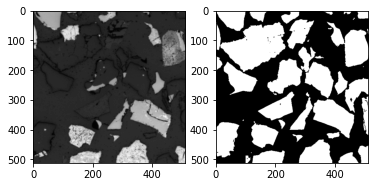

In [7]:
compare_images(array)

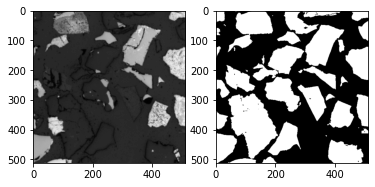

In [8]:
array2 = np.asarray(rot90(array, k = 1))
compare_images(array2)

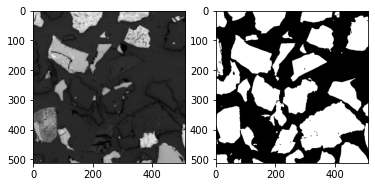

In [9]:
array3 = np.asarray(rot90(array, k = 2))
compare_images(array3)

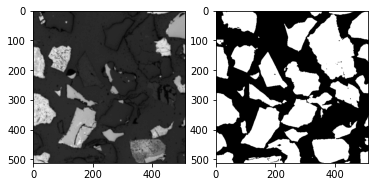

In [10]:
array4 = np.asarray(rot90(array, k = 3))
compare_images(array4)

In [11]:
file, ext = os.path.splitext(file_name)
file = f'{file}_rotation{angle}{ext}'

In [12]:
file

'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/035_rotation90.npy'

In [13]:
def augment_images(image_files: list, angles: list):
    augmented_files = []
    for angle in angles:
        for image_file in image_files:
            print(f'Rotating {image_file} by {angle}.') 
            array = load_array(image_file)
            array_rot = np.asarray(rot90(array, k = int(angle / 90.)))
            
            file_path, ext = os.path.splitext(image_file)
            file_name = f'{file_path}_rotation{angle}{ext}'
            save_array(file_name = file_name, array = array_rot)
            augmented_files.append(file_name)
                                         
    return augmented_files

In [14]:
def save_array(file_name: str, array: np.ndarray):
    with open(file_name, 'wb') as file:
        try:
            np.save(file, array)
            print(f'Saved file {file_name} successfuly.')
            status = True
        except:
            print(f'Could not save file {file_name}.')
            status = False
    return status

In [ ]:
augment_images(image_files, angles)

Rotating C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/035.npy by 90.
Loaded file C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/035.npy successfuly.
Saved file C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/035_rotation90.npy successfuly.
Rotating C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/042.npy by 90.
Loaded file C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/042.npy successfuly.
Saved file C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/042_rotation90.npy successfuly.
Rotating C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/028.npy by 90.
Loaded file C:/Users/vinici

['C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/035_rotation90.npy',
 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/042_rotation90.npy',
 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/028_rotation90.npy',
 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/025_rotation90.npy',
 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/035_rotation180.npy',
 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/042_rotation180.npy',
 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256_onechannelTrue_Train/028_rotation180.npy',
 'C:/Users/viniciusmartins/Documents/CCOMP/Projeto/DANN/processed_images/Fe19_stride256